## Reading the data

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt

df = pd.read_csv("../../corpus_sprint2_balanced_cps.csv", encoding="utf-8")
df = df.dropna()

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

## One hot encoding and concatenating

In [2]:
vectors = model.docvecs.vectors_docs

In [3]:
#print(df)

one_hot2 = pd.Categorical(df['Sub-product'])
df_dummies2 = pd.get_dummies(one_hot2)

v_df = pd.DataFrame(vectors)
df_concat = pd.concat([v_df, df_dummies2], axis = 1)
print(df_concat)

               0         1         2         3         4         5         6  \
0      -0.188312  0.235858 -0.160661 -0.062930  0.088282  0.184802  0.369231   
1      -0.069450  0.123566 -0.331953  0.132706  0.416698 -0.337001  0.119607   
2      -0.145901  0.255647  0.014258 -0.009380  0.239211 -0.127895  0.123045   
3      -0.074536  0.037086 -0.051584 -0.062005  0.204723 -0.108399  0.280387   
4       0.306871 -0.032056 -0.098984 -0.138455  0.197950 -0.033127 -0.198101   
...          ...       ...       ...       ...       ...       ...       ...   
111629 -0.131735  0.009762  0.033046 -0.530487 -0.132169  0.258420 -0.012071   
111630 -0.016358  0.296047  0.117149 -0.307706 -0.198284 -0.304725 -0.305938   
111631 -0.062303  0.288477  0.159682 -0.103658 -0.100076  0.008712 -0.103005   
111632 -0.288595  0.146657 -0.130089  0.103363 -0.111763  0.095894 -0.089777   
111633  0.192410  0.238593 -0.077316  0.058626  0.091606 -0.226398 -0.055350   

               7         8         9  .

## Applying k-means

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics

### Visual with elbow

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


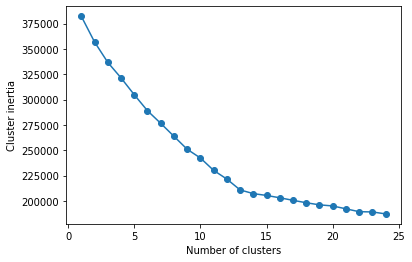

In [5]:
inertia = []
k_min=1
k_max=25
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(df_concat)
    inertia.append(km.inertia_)

plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

### Automatic with silhouette

In [6]:
sil_max = -99999
opt_k = 0
k_min=4
k_max=15

for i in range(k_min, k_max):
    print(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_concat)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    print("Train done")
    silhouette_score = metrics.silhouette_score(df_concat, labels, metric='euclidean')
    print("Silhouette done")
    print(silhouette_score)
    if(sil_max < silhouette_score):
        sil_max = silhouette_score
        opt_k = i


kmeans = KMeans(n_clusters=opt_k)
kmeans.fit(df_concat) 

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(df_concat))

4
Train done
Silhouette done
0.11203157
5
Train done
Silhouette done
0.12790294
6
Train done
Silhouette done
0.14884476
7
Train done
Silhouette done
0.16609743
8
Train done
Silhouette done
0.18563236
9
Train done
Silhouette done
0.20417298
10
Train done
Silhouette done
0.20601939
11
Train done
Silhouette done
0.22383931
12
Train done
Silhouette done
0.22891319
13
Train done
Silhouette done
0.24177553
14
Train done
Silhouette done
0.23943508
Cluster id labels for inputted data
[11 11  8 ...  4  4  4]
Centroids data
[[ 6.79797083e-02  2.80941594e-02 -8.12916160e-02 ... -4.91738319e-07
   1.12876296e-06 -3.25962901e-07]
 [-6.26859292e-02  7.59121031e-02 -4.76820059e-02 ... -7.26431608e-07
   1.13621354e-06  1.93715096e-07]
 [-8.00356716e-02  3.50124314e-02 -8.20507854e-03 ... -5.20609319e-07
   1.12876296e-06 -2.84984708e-07]
 ...
 [-8.98926407e-02 -3.90097648e-02 -9.73695815e-02 ... -1.08033419e-07
   1.11386180e-06  2.13052794e-01]
 [-5.54599166e-02 -1.45852380e-02 -1.06791064e-01 ...  

## Plotting the classes

In [7]:
df_clustered = pd.concat([df, pd.DataFrame(labels, columns=["clust"])], axis = 1)
df_clustered = df_clustered.dropna()

                                                  Product  \
0               Payday loan, title loan, or personal loan   
1               Payday loan, title loan, or personal loan   
2                                   Vehicle loan or lease   
3       Money transfer, virtual currency, or money ser...   
4               Payday loan, title loan, or personal loan   
...                                                   ...   
111629                            Bank account or service   
111630                            Bank account or service   
111631                            Bank account or service   
111632                            Bank account or service   
111633                            Bank account or service   

                       Sub-product  \
0                 Installment loan   
1                 Installment loan   
2                             Loan   
3                  Debt settlement   
4                      Payday loan   
...                            ...   
1

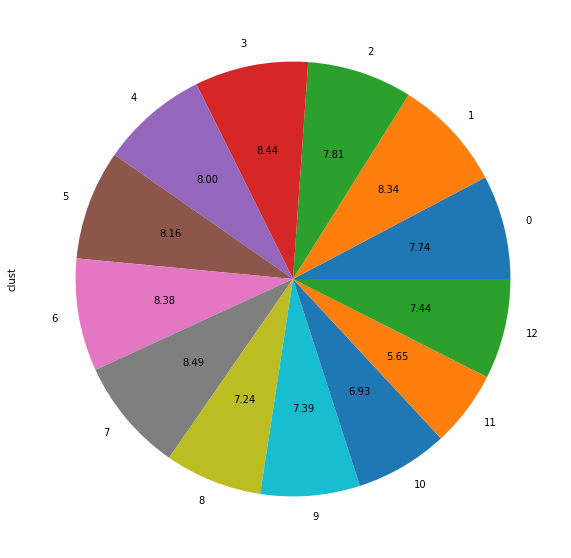

In [8]:
print(df_clustered)

df_clustered.groupby("clust")["clust"].count().plot(kind = "pie", autopct='%.2f', figsize = (10, 10))